Verinin çekilmesi

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [57]:
from pandas import read_csv
data = read_csv('loan_data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


Sütunlar ve bunlarla ilgili bilgilerin kontrol edilmesi.

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


Sütunlardaki boş değer sayılarının kontrol edilmesi.

In [59]:
data.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

Sütunlardaki boş değerlerin fazlalığa göre doldurulması ve boş değerlerden kurtulma işlemi.

In [60]:
# Gender sütunundaki eksik verileri doldurulması
gender_counts = data['Gender'].value_counts() # Cinsiyetlerin sayıları
most_frequent_gender = gender_counts.idxmax() # En çok tekrar eden cinsiyet
print('En çok tekrar eden gender:', most_frequent_gender)
data.fillna({'Gender': most_frequent_gender}, inplace=True) # Eksik verileri en çok tekrar eden cinsiyet ile doldurması

# Dependents sütunundaki eksik verileri doldurulması
dependents_counts = data['Dependents'].value_counts() # Dependents sayıları
most_frequent_dependents = dependents_counts.idxmax() # En çok tekrar eden dependents
print('En çok tekrar eden dependents:', most_frequent_dependents)
data.fillna({'Dependents': most_frequent_dependents}, inplace=True) # Eksik verileri en çok tekrar eden dependents ile doldurması

# Self_Employed sütunundaki eksik verileri doldurulması
self_employed_counts = data['Self_Employed'].value_counts() # Self_Employed sayıları
most_frequent_self_employed = self_employed_counts.idxmax() # En çok tekrar eden Self_Employed
print('En çok tekrar eden self_employed:', most_frequent_self_employed)
data.fillna({'Self_Employed': most_frequent_self_employed}, inplace=True) # Eksik verileri en çok tekrar eden Self_Employed ile doldurması

# Loan_Amount_Term sütunundaki eksik verileri doldurulması
loan_amount_term_counts = data['Loan_Amount_Term'].value_counts() # Loan_Amount_Term sayıları
most_frequent_loan_amount_term = loan_amount_term_counts.idxmax() # En çok tekrar eden Loan_Amount_Term
print('En çok tekrar eden loan_amount_term:', most_frequent_loan_amount_term)
data.fillna({'Loan_Amount_Term': most_frequent_loan_amount_term}, inplace=True) # Eksik verileri en çok tekrar eden Loan_Amount_Term ile doldurması

# Credit_History sütunundaki eksik verileri doldurulması
credit_history_counts = data['Credit_History'].value_counts() # Credit_History sayıları
most_frequent_credit_history = credit_history_counts.idxmax() # En çok tekrar eden Credit_History
print('En çok tekrar eden credit_history:', most_frequent_credit_history)
data.fillna({'Credit_History': most_frequent_credit_history}, inplace=True) # Eksik verileri en çok tekrar eden Credit_History ile doldurması


En çok tekrar eden gender: Male
En çok tekrar eden dependents: 0
En çok tekrar eden self_employed: No
En çok tekrar eden loan_amount_term: 360.0
En çok tekrar eden credit_history: 1.0


Gereksiz sütunlarun silinmesi

In [61]:
data.drop(columns=['Loan_ID'], inplace=True) # Loan_ID sütununu silmesi

Sütunların kontrolü

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         381 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      381 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    float64
 9   Credit_History     381 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


Cinsiyete göre kredi onaylanma durumu

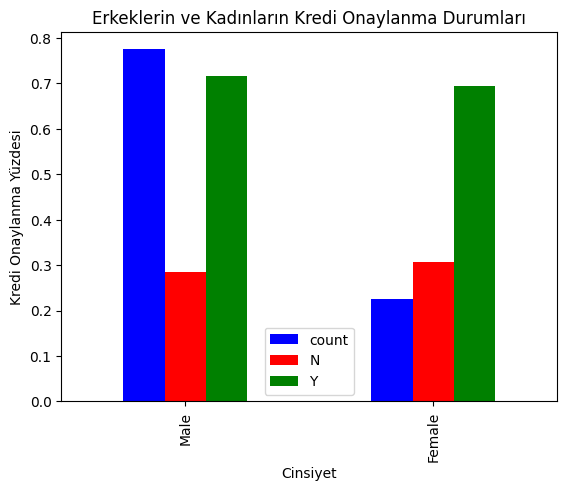

In [94]:
gender_loan_status_counts = data.groupby(['Gender', 'Loan_Status']).size().unstack()

# Yüzdelerin hesaplanması
gender_counts_percent = gender_counts / gender_counts.sum()
gender_loan_status_counts_percent = gender_loan_status_counts.div(gender_loan_status_counts.sum(axis=1), axis=0)

combined_counts = pd.concat([gender_counts_percent, gender_loan_status_counts_percent], axis=1)

combined_counts.plot(kind='bar', color=['blue', 'red', 'green'])
plt.xlabel('Cinsiyet')
plt.ylabel('Kredi Onaylanma Yüzdesi')
plt.title('Erkeklerin ve Kadınların Kredi Onaylanma Durumları')
plt.show()